
Colorimetric observer models
============================

For silent substitution we quantify light in terms of photoreceptor excitation by computing a weighted integral:

\begin{equation}
w = \int\limits_{\lambda_1}^{\lambda_2}E(\lambda)V(\lambda)d\lambda
\end{equation}

Where $\lambda_1$ and $\lambda_2$ define the wavelength range, $E(\lambda)$ is the measured light spectrum (radiance or irradiance, in photons or watts), $V(\lambda)$ is the estimated photoreceptor sensitivity function, and $d\lambda$ is the size of the wavelength bins. 

By convention ([CIE S 026/E:2018](https://cie.co.at/publications/cie-system-metrology-optical-radiation-iprgc-influenced-responses-light-0)), when this computation concerns the spectral sensitivity functions of retinal photoreceptors, the resulting measures may be called $\alpha$-opic irradiance, where $\alpha$ denotes the opsin-based photopigment of one of the five photoreceptors (cyanolabe for the S cones, chlorolabe for the M cones, erythrolabe for the L cones, rhodopsin for the rods and melanopsin for the ipRGCs). The example below shows how a measured spectrum is converted to $\alpha$-opic irradiance.

\begin{equation}
w = \sum\limits_{380}^{780}E(\lambda)S_\alpha(\lambda)\Delta\lambda
\end{equation}

![aopic irradiance](../../img/alphaopic_irradiance.svg)

The International Commission on Illumination (CIE) define [average colorimetric observer models](https://cie.co.at/publications/colorimetric-observers) with estimates of the photoreceptor spectral sensitivities for a given age and field size. These estimates are based on decades of research involving predominantly psychophysical methods. The CIE 1964 Standard Colorimetric Observer assumes an age and field size of 32 years and 10&deg;, and is deemed suitable for most situations. 

For silent substitution, it may be preferable to address [inter-observer differences in ocular physiology](07b_prereceptoral_filtering.ipynb) by adjusting the spectral sensitivity functions to account for prereceptoral filtering of incident light by the lens and other ocular media. To support this, *PySilSub* uses a `ColorimetricObserver` class, which can be passed as an argument when instantiating a `StimulationDevice` or `SilentSubstitutionProblem`. 


`pysilsub.observers.ColorimetricObserver`
-----------------------------------------

When instantiated without arguments, this corresponds to the CIE Standard Physiological Observer for a 32-year-old and 10&deg; field size. Action spectra are obtained from the [CIE S026/E:2018 toolbox](https://cie.co.at/publications/cie-system-metrology-optical-radiation-iprgc-influenced-responses-light-0) and normalised in the radiometric system. 

**Note:** For quantities expressed in the spectral photon system, a wavelength-dependent conversion and renormalisation is required to generate applicable action spectra. 

In [1]:
from pysilsub import observers 

observer = observers.ColorimetricObserver()
print(observer)
observer.action_spectra


ColorimetricObserver(age=32, field_size=10)


,sc,mc,lc,rh,mel
Wavelength,,,,,
380,0.000000e+00,0.000000,0.000000,5.890000e-04,9.181600e-04
381,0.000000e+00,0.000000,0.000000,6.650000e-04,1.045600e-03
382,0.000000e+00,0.000000,0.000000,7.520000e-04,1.178600e-03
383,0.000000e+00,0.000000,0.000000,8.540000e-04,1.322800e-03
384,0.000000e+00,0.000000,0.000000,9.720000e-04,1.483800e-03
...,...,...,...,...,...
776,1.231928e-24,0.000002,0.000024,1.730000e-07,2.550000e-08
777,2.155874e-24,0.000002,0.000022,1.640000e-07,2.420000e-08
778,2.463856e-24,0.000002,0.000021,1.550000e-07,2.290000e-08


Assigned new (probably not suitable) colors for action spectra.


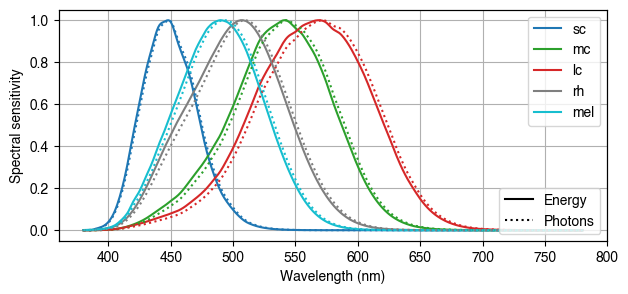

In [2]:
ax = observer.plot_action_spectra(figsize=(7.08, 3), grid=True, legend=True)

# Conversion for photon system
observer.action_spectra = (
    observer.action_spectra.apply(  # Multiply by wavelength
        lambda col: col * col.index * 5.05e15)  # E = hf
    .apply(lambda col: col / col.max())
)
observer.plot_action_spectra(ax=ax, grid=True, ls=':', legend=False)
twinax = ax.twinx()
twinax.plot([], ls='-', c='k', label='Energy')
twinax.plot([], ls=':', c='k', label='Photons')
twinax.set_yticks([])
twinax.legend(loc='lower right');

The observer class described above can also cater for ages 20-80 and field sizes of 1-10 degrees. Simply add these arguments when instantiating the class.


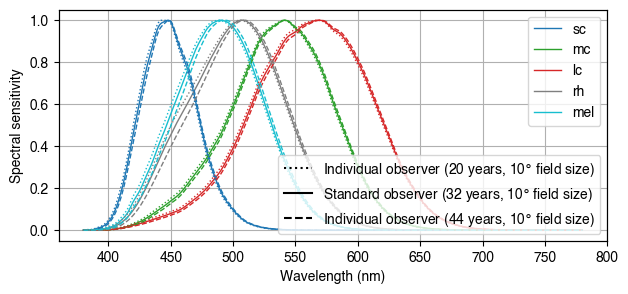

In [3]:
standard_observer = observers.ColorimetricObserver()
individual_observer_20 = observers.ColorimetricObserver(age=20, field_size=10)
individual_observer_44 = observers.ColorimetricObserver(age=44, field_size=10)

ax = standard_observer.plot_action_spectra(figsize=(7.08, 3), lw=1, grid=True)

individual_observer_20.plot_action_spectra(ax=ax, ls=':', lw=1, grid=True, legend=False)
individual_observer_44.plot_action_spectra(ax=ax, ls='--', lw=1, grid=True, legend=False)

twinax = ax.twinx()
twinax.plot([], ls=':', c='k', label='Individual observer (20 years, 10$\degree$ field size)')
twinax.plot([], ls='-', c='k', label='Standard observer (32 years, 10$\degree$ field size)')
twinax.plot([], ls='--', c='k', label='Individual observer (44 years, 10$\degree$ field size)')
twinax.set_yticks([])
twinax.legend(loc='lower right');

**Note:** When specifying age and field size:

  - LMS cone fundamentals are constructed from the photopigment absorbance spectra, taking account of the peak axial density of the respective photopigments as well as lens and macular pigment density, in accordance with [CIE 170-1:2006](https://cie.co.at/publications/fundamental-chromaticity-diagram-physiological-axes-part-1).

  - The melanopic action spectrum of the 32-year-old standard observer is adjusted for lens density with a spectral correction function, in accordance with [CIE S026/E:2018](https://cie.co.at/publications/cie-system-metrology-optical-radiation-iprgc-influenced-responses-light-0). For consistency with the aforementioned standard, a slightly different lens density function is used for this correction.
  
  - The rhodopic action spectrum of the 32-year-old standard observer is currently adjusted in the same way as the melanopic action spectrum.


Special cases
-------------

The `ColorimetricObserver` class should serve well for most situations that concern color-normal individuals. However, the toolbox can be used for special cases (e.g., dichromats, non-humans) by creating a custom observer model with the appropriate action spectra. See [this example](05c_custom_observer.ipynb) for more information.